In [ ]:
import zipfile
import os
import glob

BASE = '/content/drive/MyDrive/dip_project/shared_folder_dip'
ZIP = os.path.join(BASE, 'zip_data')
UNZIP = os.path.join(BASE, 'data')
os.makedirs(UNZIP, exist_ok=True)

zip_files = glob.glob(ZIP + "/*.zip")

for zipf in zip_files:
  file_name = zipf.split('/')[-1].split('.')[0]
  zipfile.ZipFile(zipf, 'r').extractall(os.path.join(UNZIP, file_name))
  print(f"UNZIPPED {zipf}")



UNZIPPED /content/drive/MyDrive/dip_project/shared_folder_dip/zip_data/image_train.zip
UNZIPPED /content/drive/MyDrive/dip_project/shared_folder_dip/zip_data/image_test.zip
UNZIPPED /content/drive/MyDrive/dip_project/shared_folder_dip/zip_data/image_val.zip
UNZIPPED /content/drive/MyDrive/dip_project/shared_folder_dip/zip_data/image_gt.zip


In [ ]:
%cd /content/drive/MyDrive/dip_project

/content/drive/MyDrive/dip_project


In [ ]:
!git clone https://github.com/agusgun/CISR.git

Cloning into 'CISR'...
remote: Enumerating objects: 1092, done.
remote: Total 1092 (delta 0), reused 0 (delta 0), pack-reused 1092
Receiving objects: 100% (1092/1092), 125.28 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (603/603), done.
Updating files: 100% (169/169), done.


In [ ]:
%cd /content/drive/MyDrive/dip_project/CISR/src

/content/drive/MyDrive/dip_project/CISR/src


In [ ]:
import os
import glob

DATA_ROOT = '/content/drive/MyDrive/dip_project/shared_folder_dip/data'
train_paths = sorted(glob.glob(DATA_ROOT + "/image_train/*.jpg"))
gt_paths = sorted(glob.glob(DATA_ROOT + "/image_gt/*.png"))
test_paths = sorted(glob.glob(DATA_ROOT + "/image_test/*.jpg"))
val_paths = sorted(glob.glob(DATA_ROOT + "/image_val/*.jpg")) ## 이건 validataion server에 전달해서 결과를 확인 할 수 있어야 한다. 

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
train_x, test_x, train_y, test_y = train_test_split(np.array([int(i) for i in range(len(train_paths))]), np.array([int(i) for i in range(len(train_paths))]),test_size= 0.2)

In [ ]:
with open(os.path.join(DATA_ROOT, 'train.txt'), 'w')  as w:
  for tx in train_x:
    w.writelines(train_paths[tx] + "\t" +  gt_paths[tx] + "\n")
with open(os.path.join(DATA_ROOT, 'valid.txt'), 'w') as w:
  for tx in test_x:
    w.writelines(train_paths[tx] + "\t" + gt_paths[tx] + "\n")

In [ ]:
len(train_paths), len(gt_paths)

(800, 800)

In [ ]:
train_cases = [p.split('/')[-1].split('.')[0] for p in train_paths]
gt_cases = [p.split('/')[-1].split('.')[0] for p in gt_paths]
for tc in train_cases:
  if tc not in gt_cases:
    print(tc)

In [ ]:
train_paths[0], gt_paths[0]

('/content/drive/MyDrive/dip_project/shared_folder_dip/data/image_train/0001.jpg',
 '/content/drive/MyDrive/dip_project/shared_folder_dip/data/image_gt/0001.png')

In [ ]:
import cv2
import matplotlib.pyplot as plt


train_img = cv2.imread(train_paths[0])
gt_img = cv2.imread(gt_paths[0])

print(train_img.shape, gt_img.shape)


(351, 510, 3) (1404, 2040, 3)


In [ ]:
### Train-Test split for checking the validataion score during the training process 

In [ ]:
import random

def crop_same_patch(train_img, gt_img, patch_size=48):
  h, w, c = train_img.shape;H, W, C = gt_img.shape
  cx, cy = random.choice([int(i) for i in range(patch_size//2, h-patch_size//2)]), random.choice([int(i) for i in range(patch_size//2, w-patch_size//2)]) ## random center point from the training image (Down scaled)
  x1, x2, y1, y2 = cx - patch_size//2, cx + patch_size//2, cy - patch_size//2, cy + patch_size//2
  train_patch = train_img[y1:y2, x1:x2, :]

  scale = H // h
  gt_patch = gt_img[y1*scale:y2*scale, x1*scale:x2*scale, :]

  return train_patch, gt_patch




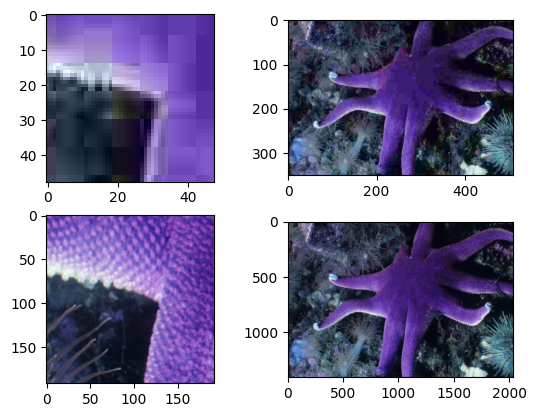

In [ ]:
tp, gp = crop_same_patch(train_img, gt_img)
plt.subplot(2, 2, 1);plt.imshow(tp);plt.subplot(2, 2, 2);plt.imshow(train_img);
plt.subplot(2, 2, 3);plt.imshow(gp);plt.subplot(2, 2, 4);plt.imshow(gt_img)

## `CISRNet: Compressed Image Super-Resolution Network`

In [1]:
%cd /content/drive/MyDrive/dip_project/CISR/src

/content/drive/MyDrive/dip_project/CISR/src


`First Stage Training: for coarse super resolution`

In [3]:
!python main.py \
--mode=train \
--data_train=DIPSRDATA \
--patch_size=192 \
--scale='4' \
--model=CISR \
--metric=psnr \
--save='CLSR_first_stage' \
--epoch=100 \
--loss='0.1*L1' \
--save_results \
--save_models \
--epochs=100 \
--first_stage_training \
--gamma=0.1 \
--decay='75' \
--reset

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
          [ 0.0062, -0.0288,  0.0281]],

         [[ 0.0281, -0.0168, -0.0083],
          [ 0.0236,  0.0164,  0.0201],
          [ 0.0008, -0.0202,  0.0153]],

         [[-0.0104,  0.0333,  0.0208],
          [ 0.0293,  0.0085, -0.0231],
          [ 0.0294, -0.0212, -0.0137]]],


        [[[-0.0091, -0.0163,  0.0071],
          [-0.0010, -0.0031,  0.0209],
          [-0.0127, -0.0168,  0.0054]],

         [[ 0.0304,  0.0339, -0.0030],
          [ 0.0043, -0.0031,  0.0076],
          [ 0.0113,  0.0274,  0.0248]],

         [[ 0.0248, -0.0007, -0.0039],
          [ 0.0237,  0.0061,  0.0329],
          [ 0.0124, -0.0309,  0.0331]],

         ...,

         [[-0.0264, -0.0132,  0.0010],
          [-0.0307, -0.0084,  0.0264],
          [-0.0133, -0.0120, -0.0167]],

         [[-0.0318,  0.0198,  0.0022],
          [-0.0241, -0.0176, -0.0201],
          [-0.0155, -0.0121,  0.0319]],

         [[-0.0032, -0.0313, -0.0204],
          [-0.0043, -0.0255,  0.01

In [1]:
%cd /content/drive/MyDrive/dip_project/CISR/src

/content/drive/MyDrive/dip_project/CISR/src


In [ ]:
!python main.py  \
--scale='4' \
--save=CISR_second_stage  \
--pre_train=/content/drive/MyDrive/dip_project/CISR/experiment/CLSR_first_stage/model/model_best.pt  \
--model=CISR  \
--lr=75e-6 \
--epochs=200  \
--decay=150 \
--gamma=0.1 \
--batch_size=8 \
--save_models \
--save_results \
--patch_size=192 \
--reset \
--data_train=DIPSRDATA \
--use_lq_train \
--use_lq_test \
--second_stage_training \
--loss=1*L1+0.05*VGG54 \
# --n_resblocks 8 

Streaming output truncated to the last 5000 lines.

         [[ 9.9634e-02, -1.0135e-01,  5.6244e-02],
          [-5.1785e-02, -1.6603e-02, -1.8308e-01],
          [-8.3799e-02,  1.1233e-01, -4.1377e-02]]],


        [[[ 1.6628e-01,  1.3061e-01, -3.1433e-02],
          [-1.5096e-01,  9.6939e-02,  4.0089e-02],
          [-1.4554e-01,  1.0516e-01,  9.7327e-02]],

         [[ 1.5413e-01, -1.2346e-01, -4.5624e-02],
          [-1.8907e-02,  1.4148e-02, -1.5880e-01],
          [-1.5082e-01,  9.0860e-02, -5.7903e-02]],

         [[ 8.0833e-02, -4.4630e-04,  5.3729e-02],
          [ 3.0825e-02,  6.0418e-02,  8.7292e-02],
          [-1.8924e-01,  8.6659e-02, -1.4438e-01]]],


        ...,


        [[[ 1.0181e-01, -1.3080e-01,  1.5000e-01],
          [-1.0627e-01, -1.3211e-01,  9.4023e-02],
          [-9.5095e-02,  1.5564e-01,  9.9035e-02]],

         [[-7.3334e-02, -2.4452e-02, -7.0459e-02],
          [ 1.5455e-04,  1.5379e-02,  1.0821e-02],
          [-1.0643e-01, -1.4361e-01, -1.0656e-01]],
